# Random Forest Algorithm

In [33]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE, RandomOverSampler

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot: xlabel='Outcome', ylabel='count'>

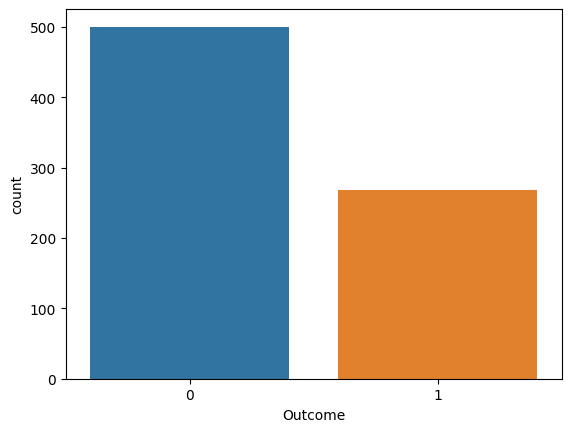

In [5]:
sns.countplot(x = df['Outcome'])

# Sampling

In [34]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

smt = SMOTE(random_state=10)
x_sample, y_sample = smt.fit_resample(x,y)


x = x_sample
y = y_sample

In [35]:
y.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

<AxesSubplot: xlabel='Outcome', ylabel='count'>

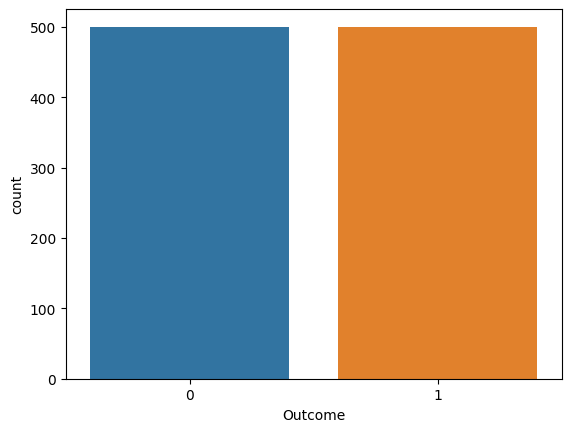

In [37]:
sns.countplot(x = y)

# Train Test Split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10, stratify=y)
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
241,91,70,32,88,33.100000,0.44600,22
204,103,72,32,190,37.700000,0.32400,55
225,87,78,27,32,34.600000,0.10100,22
819,152,77,22,167,29.009956,0.81434,47
334,95,60,18,58,23.900000,0.26000,22
...,...,...,...,...,...,...,...
65,99,74,27,0,29.000000,0.20300,32
514,99,54,19,86,25.600000,0.15400,24
718,108,60,46,178,35.500000,0.41500,24
432,80,74,11,60,30.000000,0.52700,22


# Model Training

In [39]:
# Create an instance

rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

# Model Evaluation

In [40]:
# testing Accuracy
y_pred = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[ 92  33]
 [ 22 103]]
*********************************************
Accuracy:  0.78
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       125
           1       0.76      0.82      0.79       125

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



In [41]:
# Training Accuracy
y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[375   0]
 [  0 375]]
*********************************************
Accuracy:  1.0
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       375

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



### Decision Tree Classifire

In [42]:
dt_clf = DecisionTreeClassifier(random_state=10)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [43]:
# testing Accuracy
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[89 36]
 [36 89]]
*********************************************
Accuracy:  0.712
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71       125
           1       0.71      0.71      0.71       125

    accuracy                           0.71       250
   macro avg       0.71      0.71      0.71       250
weighted avg       0.71      0.71      0.71       250



In [44]:
# Training Accuracy
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[375   0]
 [  0 375]]
*********************************************
Accuracy:  1.0
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       375

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



### Hyperparameter Tunning for Random Forest

In [13]:
rf_model = RandomForestClassifier()

n_estimators=100, # Number of DT
criterion='gini',
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
max_features='sqrt',
bootstrap=True,  # Can we avoid bootstrapping...?
oob_score=False,
n_jobs=-1,
random_state=None,
ccp_alpha=0.0

In [51]:
ccp_alpha_list = list(np.random.random(10))
ccp_alpha_list

[0.814132992171929,
 0.625859606154067,
 0.5598497323515476,
 0.8839458799392195,
 0.41226168723405043,
 0.22270534568457023,
 0.22857371031097784,
 0.0406836150302331,
 0.589789108235376,
 0.8057965390881152]

In [53]:
rf_model = RandomForestClassifier(random_state=10)

param_grid = {
                "n_estimators": np.arange(10,200),
                "criterion" : ['gini', 'entropy'],
                "max_depth" : np.arange(3,8),
                "min_samples_split" : np.arange(4,20),
                "min_samples_leaf": np.arange(3,10),
                "max_features" : ['sqrt', 'log2'],
                "oob_score" : [True],
                "ccp_alpha" : ccp_alpha_list
            }

gscv_rf_model = RandomizedSearchCV(rf_model, param_grid, cv = 5)
gscv_rf_model.fit(x_train, y_train)
gscv_rf_model.best_estimator_

RandomForestClassifier(ccp_alpha=0.0406836150302331, criterion='entropy',
                       max_depth=6, min_samples_leaf=6, min_samples_split=13,
                       n_estimators=139, oob_score=True, random_state=10)

In [54]:
rf_clf = gscv_rf_model.best_estimator_
rf_clf.fit(x_train, y_train)

# testing Accuracy
y_pred = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[91 34]
 [28 97]]
*********************************************
Accuracy:  0.752
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.75       125
           1       0.74      0.78      0.76       125

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.75      0.75      0.75       250



In [55]:
# Training Accuracy
y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[288  87]
 [ 64 311]]
*********************************************
Accuracy:  0.7986666666666666
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       375
           1       0.78      0.83      0.80       375

    accuracy                           0.80       750
   macro avg       0.80      0.80      0.80       750
weighted avg       0.80      0.80      0.80       750



## Feature Importance

In [27]:
# After Hyperparameter Tunning
rf_clf.feature_importances_

array([0.33138005, 0.05491235, 0.05781214, 0.07254133, 0.19370055,
       0.10196533, 0.18768826])

In [28]:
x.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

<AxesSubplot: >

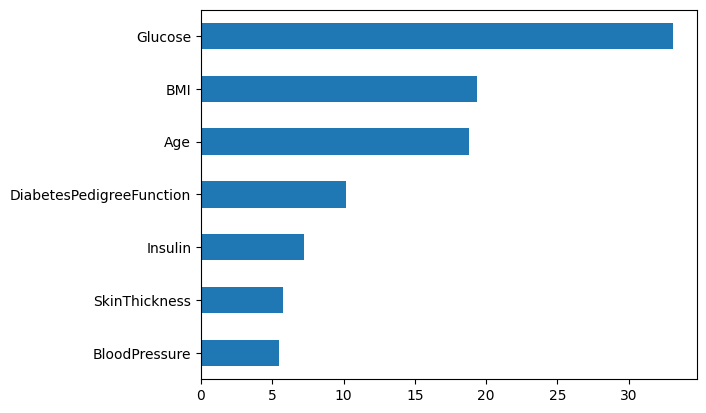

In [29]:
s1 = pd.Series(rf_clf.feature_importances_ * 100, index=x.columns)
s1.sort_values().plot(kind = 'barh')

# Prunning

In [30]:
# Not able to perform post prunning in Random Forest

# We can do pre prunning

## Out of Bag Score

In [31]:
rf_clf.oob_score

True

In [32]:
rf_clf.oob_score_

0.7430555555555556